# 1. Develop a Python script to load the fine-tuned model and tokenizer.

In [1]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Specify the model path or model name
model_name_or_path = "distilbert-base-uncased-finetuned-sst-2-english"

# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(model_name_or_path)

# Load the fine-tuned model
model = DistilBertForSequenceClassification.from_pretrained(model_name_or_path)

# Print confirmation
print("Model and tokenizer loaded successfully.")

# Example usage: Tokenizing a sample input
sample_text = "The movie was fantastic!"
inputs = tokenizer(sample_text, return_tensors="pt")

# Making a prediction using the model
outputs = model(**inputs)
logits = outputs.logits

# Print the logits (prediction scores)
print(f"Logits: {logits}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Model and tokenizer loaded successfully.
Logits: tensor([[-4.3240,  4.6845]], grad_fn=<AddmmBackward0>)


# 2. Develop a Python script for handling multimodal inputs.

multimodal inputs (text and images) using the CLIP (Contrastive Language-Image Pretraining) model from Hugging Face. CLIP can process both text and images and calculate their similarity.

The model processes the inputs and produces logits, which represent the similarity between the image and each text input.

The script calculates similarity scores for each text input relative to the image and prints them.
It also identifies the text that is most similar to the image and prints it out.

Logits per image: tensor([[29.1762, 23.0407]])
Logits per text: tensor([[29.1762],
        [23.0407]])
Most similar text for the given image: 'A photo of a cat'


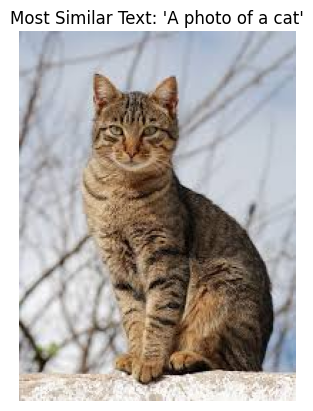

In [3]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the CLIP model and processor
model_name_or_path = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name_or_path)
processor = CLIPProcessor.from_pretrained(model_name_or_path)

# Example inputs
text_inputs = ["A photo of a cat", "A picture of a lion"]
image_path = "/download.jpeg"

# Open the image
image = Image.open(image_path)

# Preprocess the inputs
inputs = processor(text=text_inputs, images=image, return_tensors="pt", padding=True)

# Forward pass through the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract the logits (similarity scores)
logits_per_image = outputs.logits_per_image   # Image-to-text similarity
logits_per_text = outputs.logits_per_text     # Text-to-image similarity

# Print the similarity scores
print(f"Logits per image: {logits_per_image}")
print(f"Logits per text: {logits_per_text}")

# Get the most similar text for the given image
most_similar_text_index = logits_per_image.argmax()
most_similar_text = text_inputs[most_similar_text_index]

print(f"Most similar text for the given image: '{most_similar_text}'")

# Display the image
plt.imshow(image)
plt.title(f"Most Similar Text: '{most_similar_text}'")
plt.axis('off')  # Hide axes
plt.show()
